### MULTI-ASSET PORTFOLIO RISK-RETURN ANALYSIS

This is a comprehensive portfolio risk-return analysis using 5 years
of historical ETF data (November 2020 - September 2025).

Portfolio Composition:
- 40% EMB: iShares J.P. Morgan USD Emerging Markets Bond ETF
- 50% SRLN: SPDR Blackstone Senior Loan ETF
- 10% ICLN: iShares Global Clean Energy ETF

Analyses Performed:
1. Return calculation and descriptive statistics
2. Portfolio construction and weighting
3. Risk metrics (VaR, CVaR, Sharpe, Sortino, Max Drawdown)
4. Correlation and covariance analysis
5. Monte Carlo simulation (10,000 paths)
6. Market regime analysis
7. Comprehensive visualizations

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
etf_prices = pd.read_csv('/Users/bekay/Documents/Studies/MSc Financial Engineering/Models/etf_clean.csv', index_col='date', parse_dates=True)

In [3]:
etf_prices.head()

,EMB,ICLN,SRLN
date,,,
2020-11-18 05:00:00,89.454437,20.213858,31.898346
2020-11-19 05:00:00,89.658836,20.504908,31.940966
2020-11-20 05:00:00,89.721748,20.739626,31.997808
2020-11-23 05:00:00,89.650993,21.133955,32.026215
2020-11-24 05:00:00,89.776787,21.424999,32.097263


In [4]:
etf_prices.tail()

,EMB,ICLN,SRLN
date,,,
2025-09-23 04:00:00,94.753983,15.19,41.056114
2025-09-24 04:00:00,94.694489,15.14,41.056114
2025-09-25 04:00:00,94.456512,15.16,41.006756
2025-09-26 04:00:00,94.426765,15.21,41.016624
2025-09-29 04:00:00,94.585419,15.41,41.036369


In [5]:
etf_prices.isnull().sum()

EMB     0
ICLN    0
SRLN    0
dtype: int64

In [6]:
etf_prices.describe() # basic descriptive statistics

,EMB,ICLN,SRLN
count,1220.000000,1220.000000,1220.000000
mean,82.423642,17.292023,35.265369
std,7.064130,4.222223,2.638769
min,65.693726,10.448843,31.578100
25%,75.472618,13.579597,33.222836
50%,83.742085,17.758114,34.054996
75%,88.764734,20.364661,37.439525
max,94.783722,31.423410,41.065983


In [7]:
print("\n" + "="*80)
print("SECTION 2: RETURN CALCULATION")
print("="*80)


SECTION 2: RETURN CALCULATION


In [8]:
# Calculate logarithmic returns from price data
def calculate_returns(prices):
    returns = np.log(prices / prices.shift(1))
    returns = returns.dropna()
    return returns

In [9]:
# Calculate daily returns
returns = calculate_returns(etf_prices)

In [10]:
print(f"\n✓ Calculated {len(returns)} daily returns")
print(f"\nDaily Return Statistics:")
print(returns.describe())


✓ Calculated 1219 daily returns

Daily Return Statistics:
               EMB         ICLN         SRLN
count  1219.000000  1219.000000  1219.000000
mean      0.000046    -0.000223     0.000207
std       0.006274     0.018149     0.002413
min      -0.026841    -0.076161    -0.023881
25%      -0.003075    -0.010962    -0.000485
50%       0.000260    -0.000857     0.000240
75%       0.003337     0.010091     0.001139
max       0.044936     0.080215     0.021232


In [11]:
# Annualize returns and volatility
# Multiply by 252 (trading days) for annual return
# Multiply by sqrt(252) for annual volatility (due to variance scaling)
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

In [12]:
print(f"\nAnnualized Metrics:")
for etf in etf_prices.columns:
    print(f"  {etf:6s}: Return {annual_returns[etf]:7.2%}, Volatility {annual_volatility[etf]:7.2%}")


Annualized Metrics:
  EMB   : Return   1.15%, Volatility   9.96%
  ICLN  : Return  -5.61%, Volatility  28.81%
  SRLN  : Return   5.21%, Volatility   3.83%


In [13]:
print("\n" + "="*80)
print("SECTION 3: PORTFOLIO CONSTRUCTION")
print("="*80)


SECTION 3: PORTFOLIO CONSTRUCTION


In [14]:
def create_portfolio_weights():
    """  
    Notes:
    ------
    Portfolio composition based on strategic allocation:
    - 40% EMB: Core fixed income exposure to EM bonds
    - 50% SRLN: Senior secured loans for yield and credit protection
    - 10% ICLN: Growth allocation to clean energy
    
    Weights must sum to 1.0 (100% invested)
    """
    weights = pd.Series({
        'EMB': 0.40,   # 40% Emerging Markets Bonds
        'SRLN': 0.50,  # 30% Senior Loans
        'ICLN': 0.10   # 10% Clean Energy
    })

    
    return weights

In [15]:
# Define portfolio weights
weights = create_portfolio_weights()

print(f"\nPortfolio Weights:")
for etf, weight in weights.items():
    print(f"  {etf}: {weight:.1%}")


Portfolio Weights:
  EMB: 40.0%
  SRLN: 50.0%
  ICLN: 10.0%


In [16]:
def calculate_portfolio_returns(returns, weights):
    # Element-wise multiplication of returns by weights
    # (returns * weights) multiplies each column by its weight
    # .sum(axis=1) sums across columns for each row (date)
    portfolio_returns = (returns * weights).sum(axis=1)
    
    return portfolio_returns

In [17]:
# Calculate portfolio returns
portfolio_returns = calculate_portfolio_returns(returns, weights)

# Portfolio statistics
portfolio_annual_return = portfolio_returns.mean() * 252
portfolio_annual_vol = portfolio_returns.std() * np.sqrt(252)
portfolio_total_return = (np.exp(portfolio_returns.sum()) - 1)

print(f"\nPortfolio Statistics:")
print(f"  Daily mean return: {portfolio_returns.mean():.6f}")
print(f"  Daily volatility: {portfolio_returns.std():.6f}")
print(f"  Annual return: {portfolio_annual_return:.4%}")
print(f"  Annual volatility: {portfolio_annual_vol:.4%}")
print(f"  Total return: {portfolio_total_return:.4%}")


Portfolio Statistics:
  Daily mean return: 0.000099
  Daily volatility: 0.004472
  Annual return: 2.5040%
  Annual volatility: 7.0996%
  Total return: 12.8768%


In [18]:
print("\n" + "="*80)
print("SECTION 4: CORRELATION ANALYSIS")
print("="*80)


SECTION 4: CORRELATION ANALYSIS


In [19]:
def calculate_correlation_matrix(returns):
    correlation_matrix = returns.corr()
    
    return correlation_matrix

In [20]:
# Calculate correlation matrix
corr_matrix = calculate_correlation_matrix(returns)

print(f"\nCorrelation Matrix:")
print(corr_matrix)

# Covariance matrix (needed for portfolio variance)
cov_matrix = returns.cov()

print(f"\nCovariance Matrix (daily):")
print(cov_matrix)

# Annualized covariance matrix
cov_matrix_annual = cov_matrix * 252

print(f"\nCovariance Matrix (annualized):")
print(cov_matrix_annual)


Correlation Matrix:
           EMB      ICLN      SRLN
EMB   1.000000  0.465949  0.500759
ICLN  0.465949  1.000000  0.383241
SRLN  0.500759  0.383241  1.000000

Covariance Matrix (daily):
           EMB      ICLN      SRLN
EMB   0.000039  0.000053  0.000008
ICLN  0.000053  0.000329  0.000017
SRLN  0.000008  0.000017  0.000006

Covariance Matrix (annualized):
           EMB      ICLN      SRLN
EMB   0.009919  0.013370  0.001910
ICLN  0.013370  0.083009  0.004229
SRLN  0.001910  0.004229  0.001467


In [21]:
print("\n" + "="*80)
print("SECTION 5: RISK METRICS")
print("="*80)


SECTION 5: RISK METRICS


In [22]:
# --- Value at Risk (VaR) ---

def calculate_var_historical(returns, confidence_level=0.95):
    var = -np.percentile(returns, (1 - confidence_level) * 100)
    return var

In [23]:
def calculate_var_parametric(returns, confidence_level=0.95):
    mean = returns.mean()
    std = returns.std()
    z_score = stats.norm.ppf(1 - confidence_level)
    var = -(mean + std * z_score)
    return var
    

In [24]:
# Calculate VaR at different confidence levels
confidence_levels = [0.95, 0.99]

print(f"\nValue at Risk (1-day horizon):")
for conf in confidence_levels:
    var_hist = calculate_var_historical(portfolio_returns, conf)
    var_param = calculate_var_parametric(portfolio_returns, conf)
    
    print(f"\n  {conf:.0%} Confidence Level:")
    print(f"    Historical VaR: {var_hist:.4%} (${var_hist*1000000:,.0f} on $1M)")
    print(f"    Parametric VaR: {var_param:.4%} (${var_param*1000000:,.0f} on $1M)")


Value at Risk (1-day horizon):

  95% Confidence Level:
    Historical VaR: 0.7330% ($7,330 on $1M)
    Parametric VaR: 0.7257% ($7,257 on $1M)

  99% Confidence Level:
    Historical VaR: 1.1363% ($11,363 on $1M)
    Parametric VaR: 1.0305% ($10,305 on $1M)


In [25]:
# --- Conditional VaR (CVaR / Expected Shortfall) ---

def calculate_cvar(returns, confidence_level=0.95):
    # Calculate VaR threshold
    var = calculate_var_historical(returns, confidence_level)
    
    # Find all returns worse than VaR (losses exceeding VaR)
    # -var because VaR is expressed as positive loss
    tail_returns = returns[returns <= -var]
    
    # Calculate mean of tail returns
    # Negative sign to express as positive loss
    cvar = -tail_returns.mean()
    
    return cvar

In [26]:
# Calculate CVaR
var_95 = calculate_var_historical(portfolio_returns, 0.95)
cvar_95 = calculate_cvar(portfolio_returns, 0.95)

var_99 = calculate_var_historical(portfolio_returns, 0.99)
cvar_99 = calculate_cvar(portfolio_returns, 0.99)

print(f"\nConditional VaR (Expected Shortfall):")
print(f"  95% CVaR: {cvar_95:.4%} (${cvar_95*1000000:,.0f} on $1M)")
print(f"    (Average loss when loss exceeds {var_95:.4%} VaR)")
print(f"  99% CVaR: {cvar_99:.4%} (${cvar_99*1000000:,.0f} on $1M)")
print(f"    (Average loss when loss exceeds {var_99:.4%} VaR)")


Conditional VaR (Expected Shortfall):
  95% CVaR: 1.0264% ($10,264 on $1M)
    (Average loss when loss exceeds 0.7330% VaR)
  99% CVaR: 1.4815% ($14,815 on $1M)
    (Average loss when loss exceeds 1.1363% VaR)


In [27]:
# --- Sharpe Ratio ---

def calculate_sharpe_ratio(returns, risk_free_rate=0.02, periods_per_year=252):
    # Annualize return and volatility
    annual_return = returns.mean() * periods_per_year
    annual_vol = returns.std() * np.sqrt(periods_per_year)
    
    # Calculate Sharpe ratio
    sharpe = (annual_return - risk_free_rate) / annual_vol
    
    return sharpe

In [28]:
risk_free_rate = 0.02  # 2% annual risk-free rate (U.S. Treasury proxy)
sharpe_ratio = calculate_sharpe_ratio(portfolio_returns, risk_free_rate)

print(f"\nSharpe Ratio: {sharpe_ratio:.4f}")
print(f"  Risk-free rate: {risk_free_rate:.2%}")
print(f"  Interpretation: ", end="")
if sharpe_ratio > 1.0:
    print("Good risk-adjusted performance")
elif sharpe_ratio > 0.5:
    print("Acceptable performance")
elif sharpe_ratio > 0:
    print("Below-average performance")
else:
    print("Underperforming risk-free rate")


Sharpe Ratio: 0.0710
  Risk-free rate: 2.00%
  Interpretation: Below-average performance


In [29]:
# --- Sortino Ratio ---

def calculate_sortino_ratio(returns, risk_free_rate=0.02, periods_per_year=252):
    annual_return = returns.mean() * periods_per_year
    
    # Calculate downside deviation (only negative returns)
    downside_returns = returns[returns < 0]
    downside_vol = downside_returns.std() * np.sqrt(periods_per_year)
    
    sortino = (annual_return - risk_free_rate) / downside_vol
    
    return sortino

In [30]:
sortino_ratio = calculate_sortino_ratio(portfolio_returns, risk_free_rate)

print(f"\nSortino Ratio: {sortino_ratio:.4f}")
print(f"  (Uses only downside volatility)")


Sortino Ratio: 0.0989
  (Uses only downside volatility)


In [31]:
# Maximum drawdown

def calculate_maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    running_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdown.min()
    date_of_max_dd = drawdown.idxmin()
    return max_drawdown, date_of_max_dd, drawdown


In [32]:
max_dd, max_dd_date, drawdown_series = calculate_maximum_drawdown(portfolio_returns)

print(f"\nMaximum Drawdown: {max_dd:.4%}")
print(f"  Occurred on: {max_dd_date.strftime('%Y-%m-%d')}")
print(f"  Interpretation: Portfolio declined {abs(max_dd):.2%} from peak to trough")


Maximum Drawdown: -19.1703%
  Occurred on: 2022-10-20
  Interpretation: Portfolio declined 19.17% from peak to trough


In [33]:
print("\n" + "="*80)
print("SECTION 6: MONTE CARLO SIMULATION")
print("="*80)


SECTION 6: MONTE CARLO SIMULATION


In [34]:
def monte_carlo_simulation(returns, weights, n_simulations=10000, n_days=252, seed=42):
    np.random.seed(seed)
    # Calculate mean returns and covariance matrix
    mean_returns = returns.mean().values  # Convert to numpy array
    cov_matrix = returns.cov().values
    # Cholesky decomposition for correlated random numbers
    # Cholesky decomposition: Σ = L * L^T
    # This allows generating correlated random variables
    # np.linalg.cholesky() computes lower triangular matrix L
    chol_matrix = np.linalg.cholesky(cov_matrix)
    
    # Initialize results array
    simulation_results = np.zeros(n_simulations)
    
    # Run simulations
    for i in range(n_simulations):
        # Generate random standard normal returns
        # np.random.standard_normal() generates N(0,1) random variables
        # Shape: (n_days, n_assets)
        random_returns = np.random.standard_normal((n_days, len(returns.columns)))
        
        # Apply Cholesky matrix to induce correlation
        # Matrix multiplication: random_returns @ chol_matrix.T
        # @ operator performs matrix multiplication
        # .T is transpose
        correlated_returns = random_returns @ chol_matrix.T
        
        # Add mean returns (drift)
        simulated_returns = correlated_returns + mean_returns
        
        # Calculate portfolio returns for this simulation
        # Apply portfolio weights: simulated_returns @ weights.values
        portfolio_path = (simulated_returns @ weights.values).sum()
        
        simulation_results[i] = portfolio_path
    
    return simulation_results

In [35]:
# Run Monte Carlo simulation
print(f"\nRunning Monte Carlo simulation...")
print(f"  Simulations: 10,000")
print(f"  Time horizon: 252 days (1 year)")
print(f"  Method: Multivariate normal with historical mean and covariance")


Running Monte Carlo simulation...
  Simulations: 10,000
  Time horizon: 252 days (1 year)
  Method: Multivariate normal with historical mean and covariance


In [36]:
simulation_results = monte_carlo_simulation(returns, weights, 
                                           n_simulations=10000, n_days=252, seed=42)

In [37]:
# Analyze simulation results
print(f"\nMonte Carlo Results (1-year horizon):")
print(f"  Mean return: {simulation_results.mean():.4%}")
print(f"  Median return: {np.median(simulation_results):.4%}")
print(f"  Std deviation: {simulation_results.std():.4%}")
print(f"  5th percentile: {np.percentile(simulation_results, 5):.4%}")
print(f"  25th percentile: {np.percentile(simulation_results, 25):.4%}")
print(f"  75th percentile: {np.percentile(simulation_results, 75):.4%}")
print(f"  95th percentile: {np.percentile(simulation_results, 95):.4%}")
print(f"  Minimum: {simulation_results.min():.4%}")
print(f"  Maximum: {simulation_results.max():.4%}")


Monte Carlo Results (1-year horizon):
  Mean return: -1.7897%
  Median return: -1.8664%
  Std deviation: 16.7584%
  5th percentile: -29.3598%
  25th percentile: -13.0955%
  75th percentile: 9.6771%
  95th percentile: 25.6007%
  Minimum: -65.7551%
  Maximum: 68.1148%


In [38]:
# Calculate probabilities
prob_loss = (simulation_results < 0).mean()
prob_gain_10 = (simulation_results > 0.10).mean()
prob_gain_20 = (simulation_results > 0.20).mean()

print(f"\nProbabilities:")
print(f"  Probability of loss: {prob_loss:.2%}")
print(f"  Probability of >10% gain: {prob_gain_10:.2%}")
print(f"  Probability of >20% gain: {prob_gain_20:.2%}")


Probabilities:
  Probability of loss: 54.54%
  Probability of >10% gain: 24.47%
  Probability of >20% gain: 9.71%


In [39]:
print("\n" + "="*80)
print("SECTION 7: MARKET REGIME ANALYSIS")
print("="*80)


SECTION 7: MARKET REGIME ANALYSIS


In [40]:

def analyze_regime(returns, start_date, end_date, regime_name, risk_free_rate=0.02):
    # Filter returns for the regime period
    regime_returns = returns[start_date:end_date]
    
    if len(regime_returns) == 0:
        print(f"\n  {regime_name}: No data available")
        return None
    
    # Calculate statistics
    total_return = (np.exp(regime_returns.sum()) - 1)
    annual_return = regime_returns.mean() * 252
    annual_vol = regime_returns.std() * np.sqrt(252)
    sharpe = (annual_return - risk_free_rate) / annual_vol if annual_vol > 0 else 0
    
    # Duration
    duration_days = (pd.Timestamp(end_date) - pd.Timestamp(start_date)).days
    duration_months = duration_days / 30.44
    
    stats = {
        'name': regime_name,
        'start': start_date,
        'end': end_date,
        'duration_months': duration_months,
        'total_return': total_return,
        'annual_return': annual_return,
        'annual_vol': annual_vol,
        'sharpe': sharpe
    }
    
    return stats

In [41]:
# Define market regimes based on visual inspection and market events
regimes = {
    'Clean Energy Boom': ('2020-11-18', '2021-02-28'),
    'Correction Phase': ('2021-03-01', '2022-12-31'),
    'Recovery': ('2023-01-01', '2025-09-29')
}

In [42]:
regime_results = []
for regime_name, (start, end) in regimes.items():
    stats = analyze_regime(portfolio_returns, start, end, regime_name, risk_free_rate)
    if stats:
        regime_results.append(stats)
        
        print(f"\n  {regime_name} ({start} to {end}):")
        print(f"    Duration: {stats['duration_months']:.1f} months")
        print(f"    Total return: {stats['total_return']:.4%}")
        print(f"    Annual return: {stats['annual_return']:.4%}")
        print(f"    Annual volatility: {stats['annual_vol']:.4%}")
        print(f"    Sharpe ratio: {stats['sharpe']:.4f}")



  Clean Energy Boom (2020-11-18 to 2021-02-28):
    Duration: 3.4 months
    Total return: 2.7172%
    Annual return: 10.0837%
    Annual volatility: 5.9324%
    Sharpe ratio: 1.3626

  Correction Phase (2021-03-01 to 2022-12-31):
    Duration: 22.0 months
    Total return: -10.1739%
    Annual return: -5.8147%
    Annual volatility: 8.6828%
    Sharpe ratio: -0.9000

  Recovery (2023-01-01 to 2025-09-29):
    Duration: 32.9 months
    Total return: 22.3372%
    Annual return: 7.3953%
    Annual volatility: 5.9001%
    Sharpe ratio: 0.9144


In [43]:
print("\n" + "="*80)
print("SECTION 8: INDIVIDUAL ETF ANALYSIS")
print("="*80)


SECTION 8: INDIVIDUAL ETF ANALYSIS


In [44]:
def analyze_etf(prices, returns, etf_name, risk_free_rate=0.02):
    # Calculate statistics
    annual_return = returns.mean() * 252
    annual_vol = returns.std() * np.sqrt(252)
    sharpe = (annual_return - risk_free_rate) / annual_vol
    total_return = (prices.iloc[-1] / prices.iloc[0]) - 1
    
    # Maximum drawdown
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.expanding().max()
    dd = (cumulative - running_max) / running_max
    max_dd = dd.min()
    
    # Distribution statistics
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    
    stats = {
        'ETF': etf_name,
        'Annual_Return': annual_return,
        'Annual_Vol': annual_vol,
        'Sharpe': sharpe,
        'Total_Return': total_return,
        'Max_DD': max_dd,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }
    
    return stats

In [45]:
# Analyze each ETF
etf_stats = []
for etf in etf_prices.columns:
    stats = analyze_etf(etf_prices[etf], returns[etf], etf, risk_free_rate)
    etf_stats.append(stats)

# Create DataFrame for display
etf_df = pd.DataFrame(etf_stats)

print(f"\nIndividual ETF Statistics:")
print(etf_df.to_string(index=False))



Individual ETF Statistics:
 ETF  Annual_Return  Annual_Vol    Sharpe  Total_Return    Max_DD  Skewness  Kurtosis
 EMB       0.011530    0.099594 -0.085045      0.057359 -0.294342  0.237339  3.909602
ICLN      -0.056096    0.288113 -0.264117     -0.237652 -0.722351  0.187697  2.044028
SRLN       0.052075    0.038301  0.837457      0.286473 -0.080740 -0.817008 18.077669


In [46]:
print("\n" + "="*80)
print("SECTION 9: SAVING RESULTS")
print("="*80)


SECTION 9: SAVING RESULTS


In [47]:
# Save summary statistics
summary_data = {
    'Metric': [
        'Data Period Start',
        'Data Period End',
        'Total Days',
        'Years',
        'Annual Return',
        'Annual Volatility',
        'Sharpe Ratio',
        'Sortino Ratio',
        'Max Drawdown',
        'Max DD Date',
        'VaR 95%',
        'CVaR 95%',
        'VaR 99%',
        'CVaR 99%',
        'MC Mean Return',
        'MC Prob Loss'
    ],
    'Value': [
        etf_prices.index[0].strftime('%Y-%m-%d'),
        etf_prices.index[-1].strftime('%Y-%m-%d'),
        len(etf_prices),
        f"{(etf_prices.index[-1] - etf_prices.index[0]).days / 365.25:.1f}",
        f"{portfolio_annual_return:.4%}",
        f"{portfolio_annual_vol:.4%}",
        f"{sharpe_ratio:.4f}",
        f"{sortino_ratio:.4f}",
        f"{max_dd:.4%}",
        max_dd_date.strftime('%Y-%m-%d'),
        f"{var_95:.4%}",
        f"{cvar_95:.4%}",
        f"{var_99:.4%}",
        f"{cvar_99:.4%}",
        f"{simulation_results.mean():.4%}",
        f"{prob_loss:.2%}"
    ]
}

summary_df = pd.DataFrame(summary_data)

In [48]:
summary_df

,Metric,Value
0,Data Period Start,2020-11-18
1,Data Period End,2025-09-29
2,Total Days,1220
3,Years,4.9
4,Annual Return,2.5040%
5,Annual Volatility,7.0996%
6,Sharpe Ratio,0.0710
7,Sortino Ratio,0.0989
8,Max Drawdown,-19.1703%
9,Max DD Date,2022-10-20


In [49]:
# Save simulation results
sim_df = pd.DataFrame({'Simulated_Return': simulation_results})

In [50]:
print("\n" + "="*80)
print("SECTION 10: CREATING VISUALIZATIONS")
print("="*80)


SECTION 10: CREATING VISUALIZATIONS


In [51]:
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

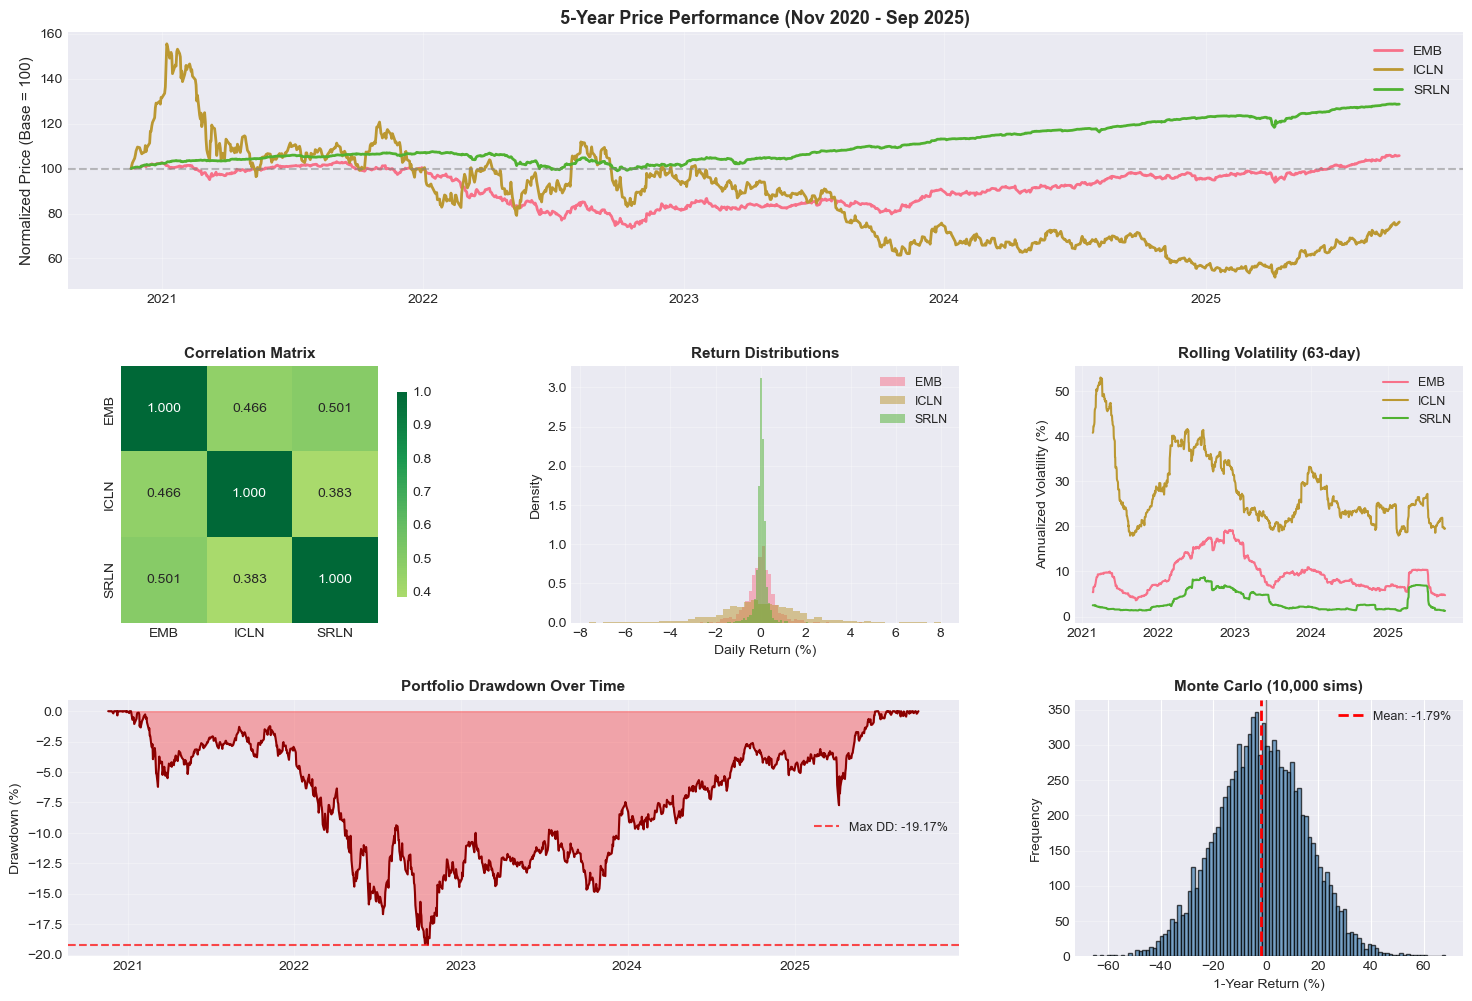

In [52]:
# Create comprehensive multi-panel visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Panel 1: Price Performance
ax1 = fig.add_subplot(gs[0, :])
for col in etf_prices.columns:
    normalized = (etf_prices[col] / etf_prices[col].iloc[0]) * 100
    ax1.plot(normalized, label=col, linewidth=2)
ax1.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax1.set_ylabel('Normalized Price (Base = 100)', fontsize=11)
ax1.set_title('5-Year Price Performance (Nov 2020 - Sep 2025)', 
             fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Panel 2: Correlation Matrix
ax2 = fig.add_subplot(gs[1, 0])
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            square=True, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Correlation Matrix', fontsize=11, fontweight='bold')

# Panel 3: Return Distributions
ax3 = fig.add_subplot(gs[1, 1])
for col in returns.columns:
    ax3.hist(returns[col] * 100, bins=50, alpha=0.5, label=col, density=True)
ax3.set_xlabel('Daily Return (%)', fontsize=10)
ax3.set_ylabel('Density', fontsize=10)
ax3.set_title('Return Distributions', fontsize=11, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Panel 4: Rolling Volatility
ax4 = fig.add_subplot(gs[1, 2])
rolling_vol = returns.rolling(window=63).std() * np.sqrt(252) * 100
for col in rolling_vol.columns:
    ax4.plot(rolling_vol.index, rolling_vol[col], label=col, linewidth=1.5)
ax4.set_ylabel('Annualized Volatility (%)', fontsize=10)
ax4.set_title('Rolling Volatility (63-day)', fontsize=11, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# Panel 5: Portfolio Drawdown
ax5 = fig.add_subplot(gs[2, :2])
drawdown_pct = drawdown_series * 100
ax5.fill_between(drawdown_pct.index, drawdown_pct.values, 0, 
                 alpha=0.3, color='red')
ax5.plot(drawdown_pct.index, drawdown_pct.values, color='darkred', linewidth=1.5)
ax5.axhline(y=max_dd*100, color='red', linestyle='--', alpha=0.7,
           label=f'Max DD: {max_dd:.2%}')
ax5.set_ylabel('Drawdown (%)', fontsize=10)
ax5.set_title('Portfolio Drawdown Over Time', fontsize=11, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# Panel 6: Monte Carlo Results
ax6 = fig.add_subplot(gs[2, 2])
ax6.hist(simulation_results * 100, bins=100, edgecolor='black', 
        alpha=0.7, color='steelblue')
ax6.axvline(x=simulation_results.mean()*100, color='red', linestyle='--',
           linewidth=2, label=f'Mean: {simulation_results.mean():.2%}')
ax6.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
ax6.set_xlabel('1-Year Return (%)', fontsize=10)
ax6.set_ylabel('Frequency', fontsize=10)
ax6.set_title('Monte Carlo (10,000 sims)', fontsize=11, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')
plt.show()

In [53]:
print("\n" + "="*80)
print("FINAL SUMMARY STATISTICS")
print("="*80)


FINAL SUMMARY STATISTICS


In [54]:
print(f"\nPORTFOLIO PERFORMANCE:")
print(f"  Period: {etf_prices.index[0].strftime('%Y-%m-%d')} to {etf_prices.index[-1].strftime('%Y-%m-%d')}")
print(f"  Duration: {(etf_prices.index[-1] - etf_prices.index[0]).days / 365.25:.1f} years")
print(f"  Annual Return: {portfolio_annual_return:.4%}")
print(f"  Annual Volatility: {portfolio_annual_vol:.4%}")
print(f"  Total Return: {portfolio_total_return:.4%}")

print(f"\nRISK-ADJUSTED METRICS:")
print(f"  Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"  Sortino Ratio: {sortino_ratio:.4f}")
print(f"  Maximum Drawdown: {max_dd:.4%}")

print(f"\nRISK METRICS (1-day, 95%):")
print(f"  VaR: {var_95:.4%}")
print(f"  CVaR: {cvar_95:.4%}")

print(f"\nMONTE CARLO FORECAST (1-year):")
print(f"  Expected Return: {simulation_results.mean():.4%}")
print(f"  Probability of Loss: {prob_loss:.2%}")
print(f"  5th Percentile: {np.percentile(simulation_results, 5):.4%}")
print(f"  95th Percentile: {np.percentile(simulation_results, 95):.4%}")

print("\n" + "="*80)



PORTFOLIO PERFORMANCE:
  Period: 2020-11-18 to 2025-09-29
  Duration: 4.9 years
  Annual Return: 2.5040%
  Annual Volatility: 7.0996%
  Total Return: 12.8768%

RISK-ADJUSTED METRICS:
  Sharpe Ratio: 0.0710
  Sortino Ratio: 0.0989
  Maximum Drawdown: -19.1703%

RISK METRICS (1-day, 95%):
  VaR: 0.7330%
  CVaR: 1.0264%

MONTE CARLO FORECAST (1-year):
  Expected Return: -1.7897%
  Probability of Loss: 54.54%
  5th Percentile: -29.3598%
  95th Percentile: 25.6007%

